In [267]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as wi 
from matplotlib import animation, rc
from IPython.display import Image
from scipy.integrate import odeint

Ejercicio 1

In [268]:
def ecuacion(n,a,b,y0,lamb):
    h = (b-a)/n
    t = np.arange(a,b,h)
    y = [0 for i in range(n)]
    y[0] = y0

    for i in range(n-1):
        y[i+1] = y[i] + h*(lamb*y[i])

    return (t,y)

In [269]:
t, y = ecuacion(100, 0, 1, 1, 10)

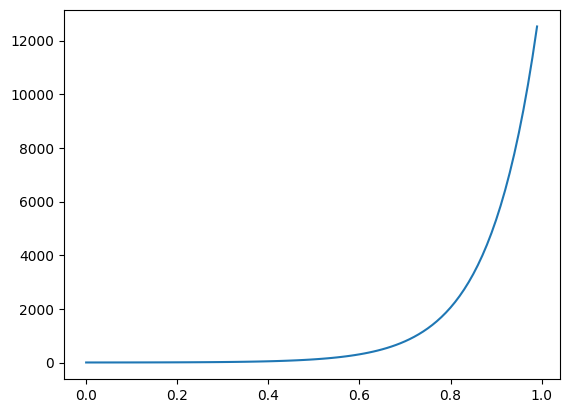

In [270]:
plt.plot(t,y)

Ejercicio 2

In [271]:
def logistica(h,a,b,P0,r,K):
    n = int((b-a)/h)
    t = np.arange(a,b,h)
    P = [0 for i in range(n)]
    P[0] = P0

    for i in range(n-1):
        P[i+1] = P[i] + h*(r*P[i]*(1-(P[i]/K)))

    return (t, P)

In [272]:
K = 100
r = 2
P0 = 10

In [273]:
t, P = logistica(0.01,0,10,P0,r,K)

In [274]:
P1 = [(K/(1+((K-P0)/P0*np.exp(-r*i)))) for i in t]

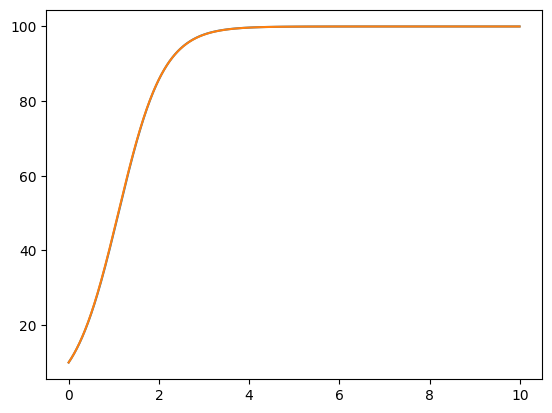

In [275]:
plt.plot(t,P)
plt.plot(t, P1)

In [276]:
def errorh(M, funcion):
    e = [0 for i in range(M)]
    h = [0 for j in range(M)]
    for i in range(M):
        H = 2**(-i)
        h[i] = H
        t,P = funcion(H, 0, 10, P0, r, K)
        P1 = [(K/(1+((K-P0)/P0*np.exp(-r*i)))) for i in t]
        e[i] = abs(P[-1]-P1[-1])
    return (e, h)

In [277]:
e, h = errorh(8, logistica)

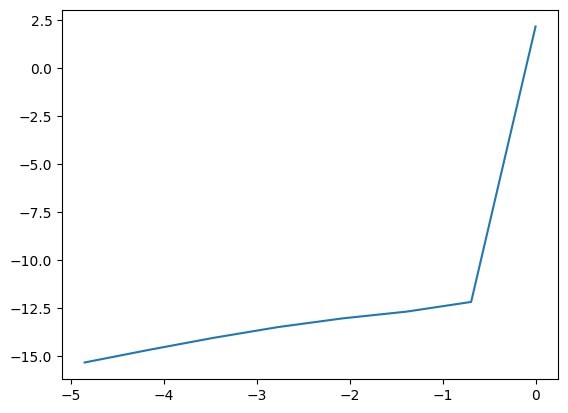

In [278]:
plt.plot(np.log(h),np.log(e))

In [279]:
def f(t, P):
    return r*P*(1-(P/K))

In [280]:
def logistica2(h,a,b,P0,r,K):
    n = int((b-a)/h)
    t = np.arange(a,b,h)
    P = [0 for i in range(n)]
    P[0] = P0

    for i in range(n-1):
        P[i+1] = P[i] + h*f(t[i]+(h/2), P[i]+(h/2)*f(t[i], P[i]))

    return (t, P)

In [281]:
e, h = errorh(8, logistica2)

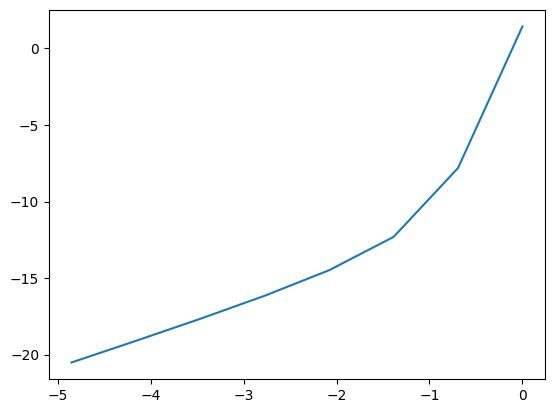

In [282]:
plt.plot(np.log(h),np.log(e))

Ejercicio 3

In [283]:
def Euler(a,b,n,F,y0,p):
    h = (b-a)/n
    t = np.arange(a,b,h)
    y = np.zeros((len(y0), n))
    y[:,0] = y0

    for i in range(n-1):
        y[:,i+1] = y[:,i] + h*(F(t[i], y[:,i],p))
    
    return (t,y)

In [284]:
def Heun(a,b,n,F,y0,p):
    h = (b-a)/n
    t = np.arange(a,b,h)
    y = [0 for i in range(n)]
    y[0] = y0

    for i in range(n-1):
        K1 = F(t[i], y[i], p)
        K2 = F(t[i]+(2/3)*h, y[i]+(2/3)*h*K1, p)
        y[i+1] = y[i] + h*((1/4)*K1+(3/4)*K2)
    
    return (t,y)

In [285]:
def r(t):
    return (0.2 + 0.2*np.cos(2*np.pi*t))

In [286]:
K = 1000
m = 0.1

In [287]:
def g(ti,yi,p):
    return r(ti)*yi*(1-(yi/K))-m*yi

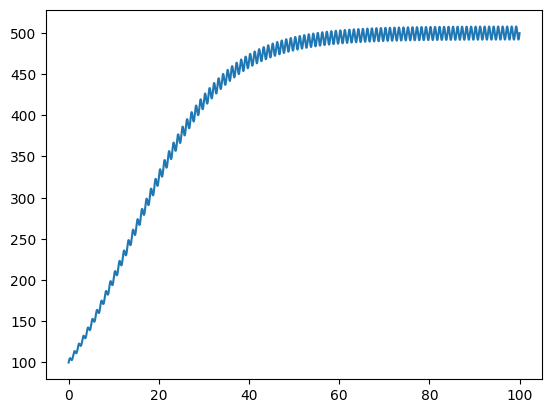

In [288]:
t, y = Heun(0, 100, 18250, g, 100, [])
plt.plot(t,y)

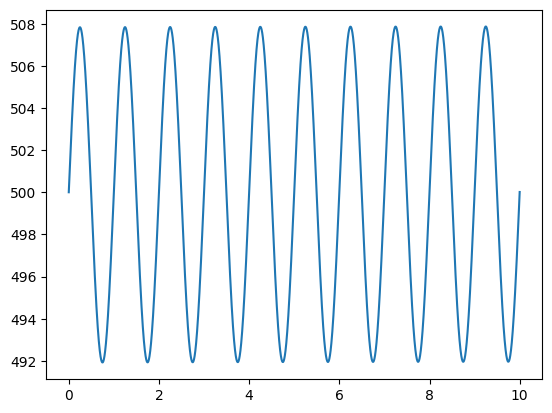

In [289]:
t, y = Heun(0, 10, 18250, g, 500, [])
plt.plot(t,y)

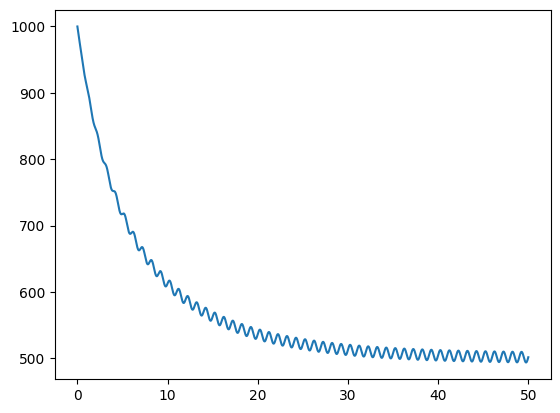

In [290]:
t, y = Heun(0, 50, 18250, g, 1000, [])
plt.plot(t,y)

Ejercicio 4

In [291]:
def RungeKuttaGen(a,b,n,F,y0,alp,A1,A2,p):
    h = (b-a)/n
    t = np.arange(a,b,h)
    y = np.zeros((len(y0), n))
    y[:,0] = y0

    for i in range(n-1):
        K1 = F(t[i], y[:,i], p)
        K2 = F(t[i]+alp*h, y[:,i]+alp*h*K1, p)
        y[:,i+1] = y[:,i] + h*(A1*K1+A2*K2)

    return (t, y)

Ejercicio 5

In [292]:
g = 9.81
cr = 0.028
m = 0.084
y0 = np.array([50, -3])

In [293]:
def T(t,v,p):
    return np.array([-v[1], g - (cr/m)*((v[1])**2)])

In [294]:
t, v = RungeKuttaGen(0, 5, 100, T, y0, 2/3, 1/4, 3/4, [])

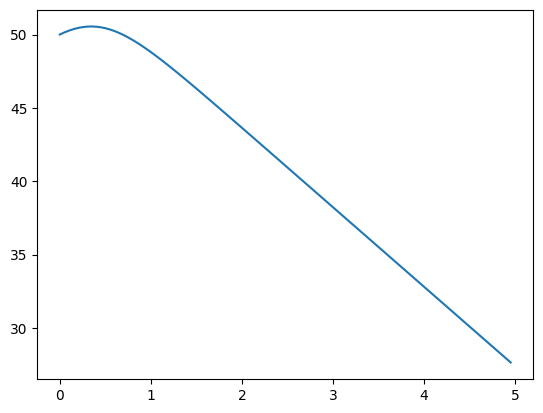

In [295]:
plt.plot(t,v[0])

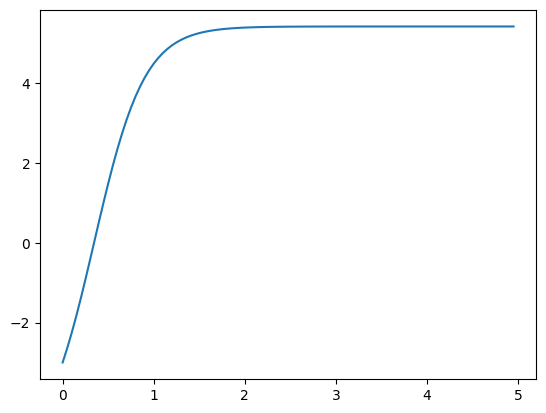

In [296]:
plt.plot(t,v[1])

Ejercicio 6

In [297]:
alpha = 0.5
beta = 0.5
gamma = 0.5
delta = 0.5
y0 = np.array([10,20])

In [298]:
def L(t,z,p):
    return np.array([-p[0]*z[0]+p[2]*z[0]*z[1], p[1]*z[1]-p[3]*z[0]*z[1]])

In [299]:
t, z = Euler(0, 20, 1000, L, y0, [alpha, beta, gamma, delta])

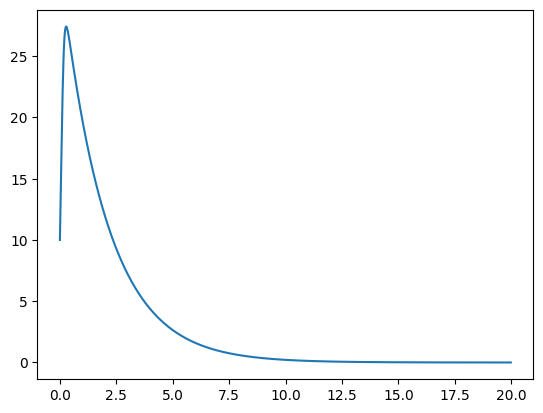

In [300]:
plt.plot(t,z[0])

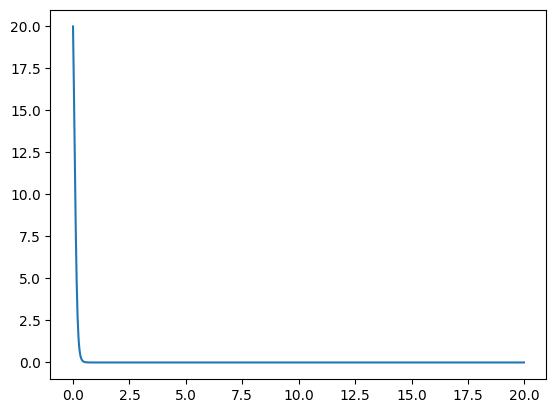

In [301]:
plt.plot(t,z[1])

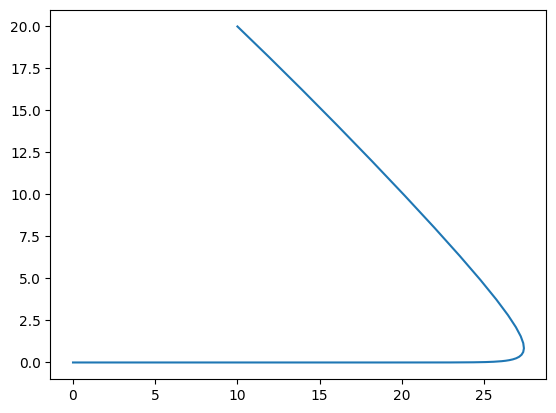

In [302]:
plt.plot(z[0],z[1])

In [303]:
alpha = 0.25
beta = 1
gamma = 0.01
delta = 0.01
y0 = np.array([80,30])

In [304]:
t, z = Euler(0, 20, 10000, L, y0, [alpha, beta, gamma, delta])

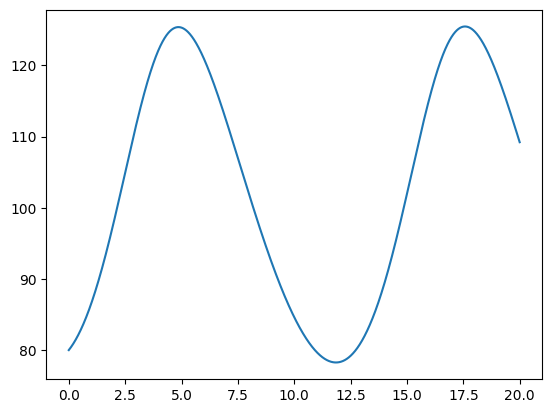

In [305]:
plt.plot(t,z[0])

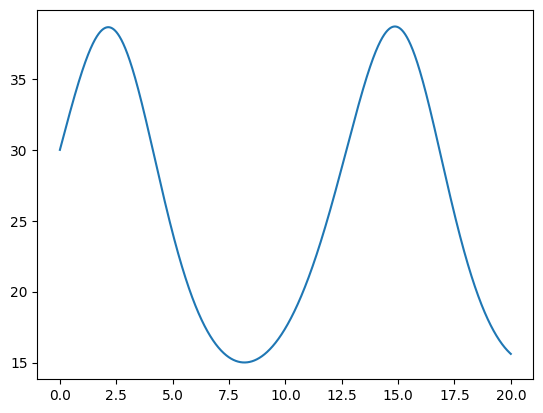

In [306]:
plt.plot(t,z[1])

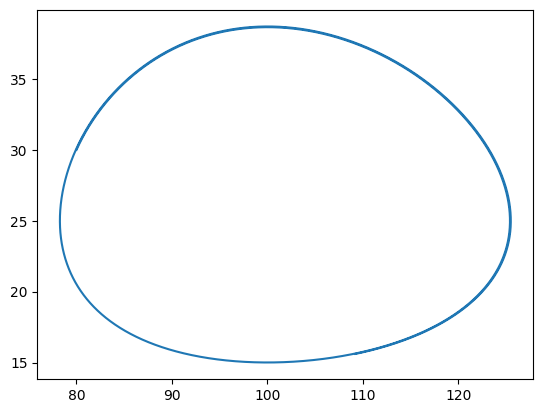

In [307]:
plt.plot(z[0],z[1])

Ejercicio 7

$$\begin{CD} A+X @>k_1>> 2X \end{CD}$$
$$\begin{CD} X+Y @>k_2>> 2Y \end{CD}$$
$$\begin{CD} Y @>k_3>> B \end{CD}$$

In [308]:
k1 = 0
k2 = 0.6
k3 = 0

y0 = np.array([0.4, 0.3, 0.1, 0.2])

In [309]:
def quimica(t, y, p):
    return np.array([-p[0]*y[0]*y[1], p[0]*y[0]*y[1] - p[1]*y[1]*y[2], p[1]*y[1]*y[2]-p[2]*y[2], p[2]*y[2]])

In [310]:
t, y = Euler(0, 20, 1000, quimica, y0, [k1,k2,k3])

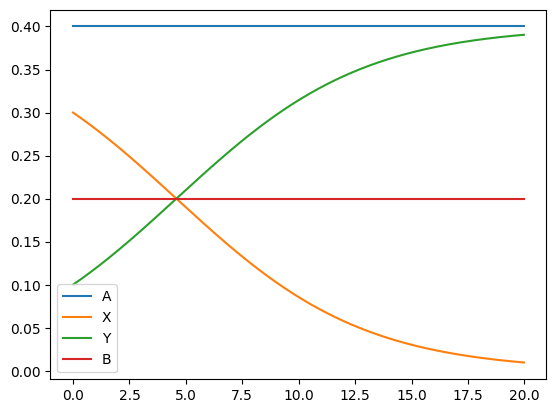

In [311]:
plt.plot(t, y[0], label = "A")
plt.plot(t, y[1], label = "X")
plt.plot(t, y[2], label = "Y")
plt.plot(t, y[3], label = "B")
plt.legend()

Ejercicio 8

In [312]:
beta = 10
gamma = 0.1
N = 100000
y0 = [N-1000, 1000, 0]

In [313]:
def G(t, y, p):
    return np.array([-p[0]*(y[0]*y[1]/N), p[0]*(y[0]*y[1]/N) - p[1]*y[1], p[1]*y[1]])

In [314]:
t, y = Euler(0, 20, 10000, G, y0, [beta, gamma])

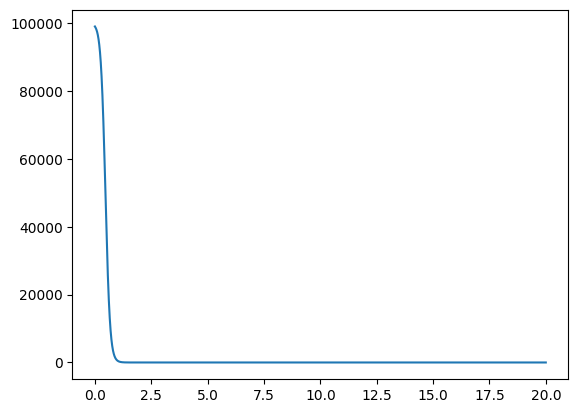

In [315]:
plt.plot(t, y[0])

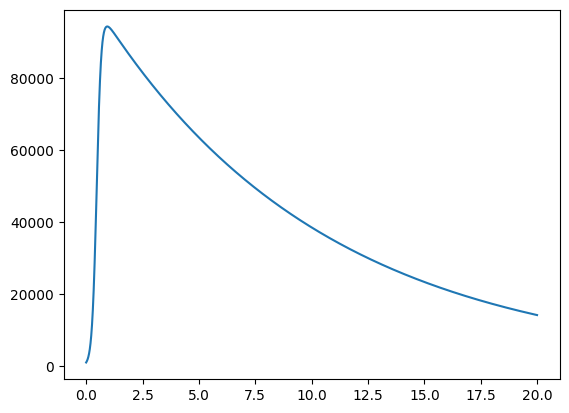

In [316]:
plt.plot(t, y[1])

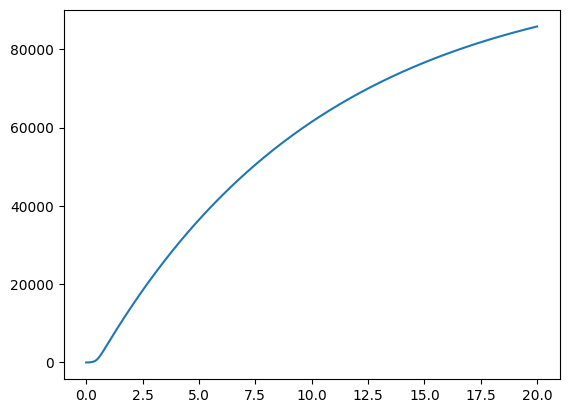

In [317]:
plt.plot(t, y[2])

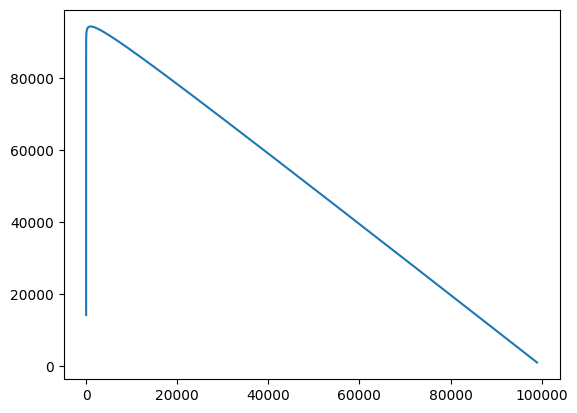

In [318]:
plt.plot(y[0], y[1])

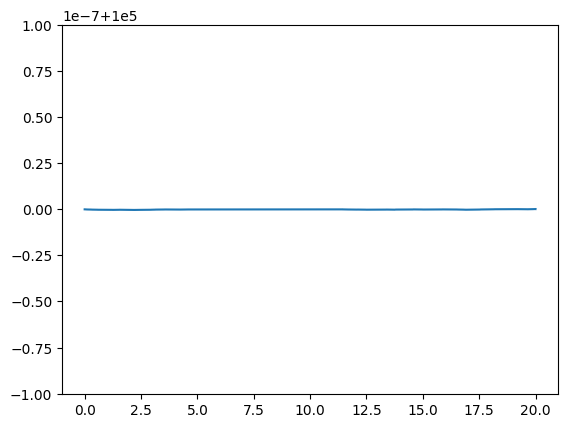

In [319]:
plt.plot(t, y[0]+y[1]+y[2])

In [320]:
y[0]+y[1]+y[2]

array([100000., 100000., 100000., ..., 100000., 100000., 100000.],
      shape=(10000,))

In [321]:
[i for i in range(len(y[0])) if y[0][i] < (N*gamma)/beta][0]

468

In [322]:
t[468]

np.float64(0.936)

Ejercicio 9

In [323]:
r = 1
K = 1
tau = 1
N0 = [0.5, 0.5]

In [324]:
def H(t,N,Nt):
    return (r*N*(1-(Nt/K)))

In [325]:
def hutchinson(a,b,n,H,N0,tau):
    h = (b-a)/n
    t = np.arange(a,b,h)
    N = np.zeros((len(N0), n))
    N[:,0] = N0

    for i in range(n-1):
        if t[i] <= tau:
            N[1][i+1] = N0[1]
            N[0][i+1] = N[0][i] + h*(r*N[0][i]*(1-(N[1][i]/K)))
        elif t[i] > tau:
            N[1][i+1] = N[1][i] + h*(r*N[1][i]*(1-(N[1][i-int(tau/h)]/K)))
            N[0][i+1] = N[0][i] + h*(r*N[0][i]*(1-(N[1][i]/K)))
            
    return (t,N)

In [326]:
t, N = hutchinson(0, 40, 1000, H, N0, tau)

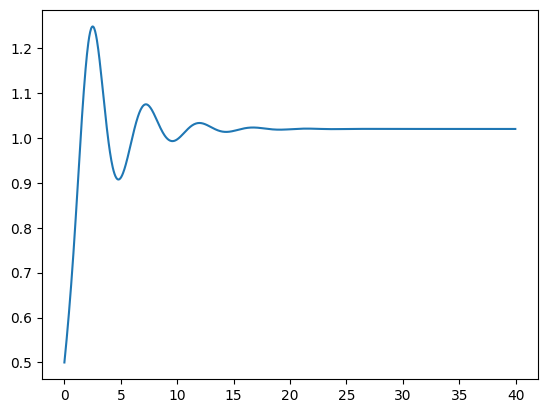

In [327]:
plt.plot(t, N[0])

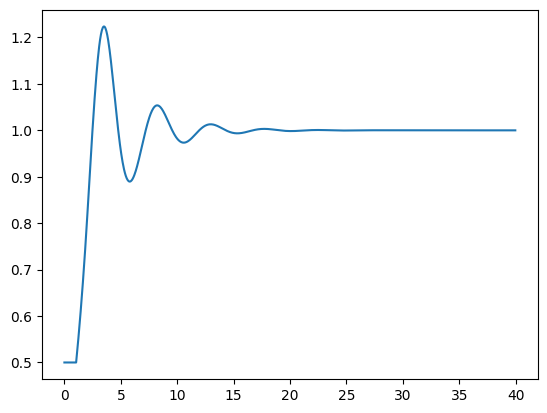

In [328]:
plt.plot(t, N[1])

Problema 11

In [467]:
G = 0.4982

m1 = 1.9891*(10**30)
m2 = 5.97*(10**24)
m3 = 7.3477*(10**22)

dts = 1.4959*(10**11)
dtl = 3.844*(10**8)

vt = (2*(np.pi)*dts)/365
vls = vt
vlt = (2*(np.pi)*dtl)/28

y0 = np.array([0,0,dts,0,dts,dtl,0,0,0,vt,-vlt,vls])

In [468]:
def tres_cuerpos(t, y, p):
    x1,y1,x2,y2,x3,y3,vx1,vy1,vx2,vy2,vx3,vy3 = y
    n12 = np.sqrt((x1-x2)**2+(y1-y2)**2)
    n13 = np.sqrt((x1-x3)**2+(y1-y3)**2)
    n23 = np.sqrt((x2-x3)**2+(y2-y3)**2)
    
    return np.array([vx1,vy1,vx2,vy2,vx3,vy3,
                     (G*m3*(x3-x1))/(n13**3) + (G*m2*(x2-x1))/(n12**3), (G*m2*(y2-y1))/(n12**3) + (G*m3*(y3-y1))/(n13**3),
                     (G*m1*(x1-x2))/(n12**3) + (G*m3*(x3-x2))/(n23**3), (G*m1*(y1-y2))/(n12**3) + (G*m3*(y3-y2))/(n23**3),
                     (G*m2*(x2-x3))/(n23**3) + (G*m1*(x1-x3))/(n13**3), (G*m1*(y1-y3))/(n13**3) + (G*m2*(y2-y3))/(n23**3)])

In [498]:
t, y = Euler(0, 50, 10000, tres_cuerpos, y0, [])

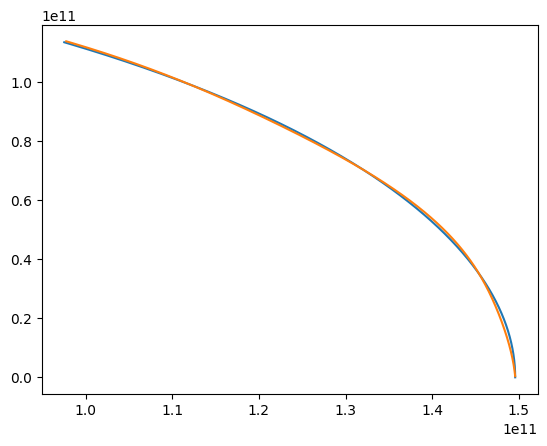

In [ ]:
plt.plot(y[0],y[1], "o")
plt.plot(y[2],y[3])
plt.plot(y[4],y[5])

In [ ]:
tray_x = y[0]
tray_y = y[2]

tray_x = list(map(float, tray_x))
tray_y = list(map(float, tray_y))

fig, ax = plt.subplots(figsize=(8, 4))
ax.set_xlim(0, ancho)
ax.set_ylim(0, 10)
pelota, = ax.plot([], [], 'ro', markersize=10)
trayectoria, = ax.plot([], [], 'b-', lw=1)

def init():
    pelota.set_data([], [])
    trayectoria.set_data([], [])
    return pelota, trayectoria

def update(frame):
    x_val = tray_x[frame]
    y_val = tray_y[frame]
    pelota.set_data([x_val], [y_val]) 
    trayectoria.set_data(tray_x[:frame+1], tray_y[:frame+1])
    return pelota, trayectoria

ani = animation.FuncAnimation(fig, update, frames=len(tray_x),init_func=init, blit=True, interval=10)


ani.save("pelota.gif", writer=animation.PillowWriter(fps=20))
display(Image(filename="pelota.gif"))

Ejercicio 14.1

In [335]:
df  =  pd.read_csv("hudson.txt", delim_whitespace = True , header = None)

C:\Users\bravo\AppData\Local\Temp\ipykernel_11432\2569439821.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df  =  pd.read_csv("hudson.txt", delim_whitespace = True , header = None)


In [336]:
df.loc[31, 1] = '97.12'

In [337]:
tiempo = [df[0][i] for i in range(len(df))]

In [338]:
linces = [float(df[1][i].replace(",",".")) for i in range(len(df))]

In [339]:
liebres = [float(df[2][i].replace(",",".")) for i in range(len(df))]

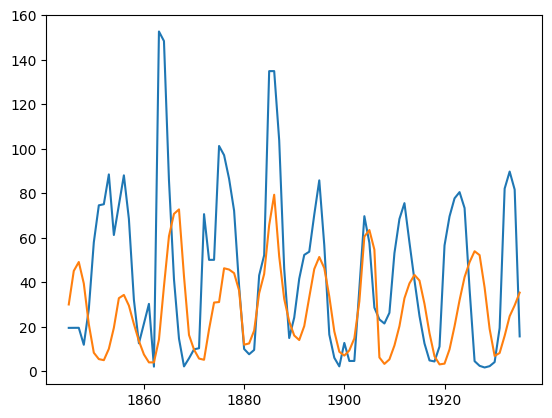

In [340]:
plt.plot(tiempo, linces)
plt.plot(tiempo, liebres)

In [341]:
alpha = 0.4
beta = 1
gamma = 0.08
delta = 0.08
y0 = np.array([30,10])

In [342]:
t, y = Euler(0, 90, 1000, L, y0, [alpha, beta, gamma, delta])

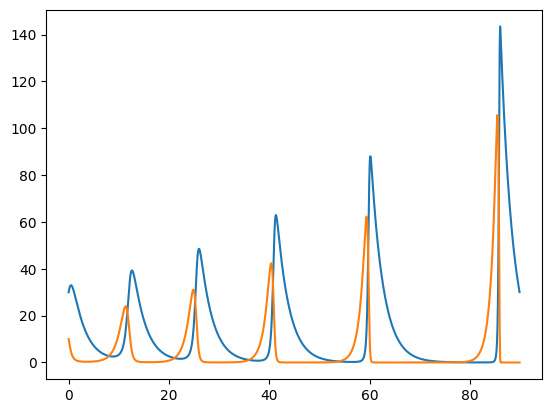

In [343]:
plt.plot(t, y[0])
plt.plot(t, y[1])

In [344]:
prom = np.array([[0,0] for i in range(len(linces))])
prom[0] = [linces[0], liebres[0]]
prom[len(linces)-1] = [linces[len(linces)-1], liebres[len(linces)-1]]
for i in range(1,len(linces)-1):
    prom[i][0] = (linces[i-1] + linces[i] + linces[i+1])/3
    prom[i][1] = (liebres[i-1] + liebres[i] + liebres[i+1])/3

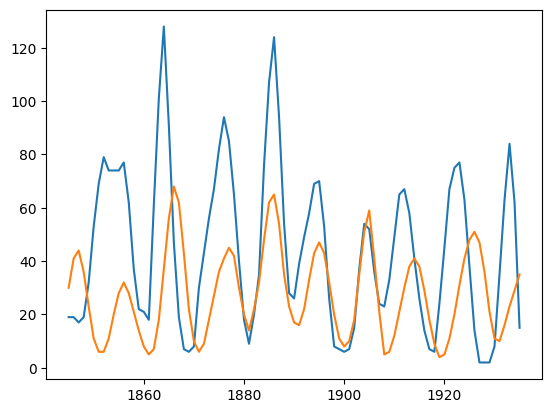

In [345]:
plt.plot(tiempo, prom[:,0])
plt.plot(tiempo, prom[:,1])

Ejercicio 14.2

In [346]:
eps = 0
k1 = 0
k2 = 0

In [347]:
def intra(t, y, p):
    return np.array([-p[0]*y[0]+p[2]*y[0]*y[1], p[1]*y[1]-p[3]*y[0]*y[1]-p[4]*(y[1]**2)])

In [348]:
def holling(t, y, p):
    return np.array([-p[0]*y[0]+p[2]*y[0]*y[1]/(1+p[4]*y[1]), p[1]*y[1]-p[3]*y[0]*y[1]/(1+p[5]*y[1])])

Ejercicio 15

In [349]:
mc = 16
gammac = 0.0058
mm = 0.0082
gammam = 3.74 * (10**(-5))
y0 = np.array([55.8, 0, 55.8, 0])

In [350]:
def Viviani(t, y, m, gamma):
    return np.array([-y[1], g-gamma*(y[1]**2)/m])

In [351]:
def EulerConFreno(a,b,n,F,y0,freno):
    h = (b-a)/n
    t = np.arange(a,b,h)
    y = np.zeros((len(y0), n))
    y[:,0] = y0

    for i in range(n-1):
        if y[:2,i][0] > freno:
            y[:2,i+1] = y[:2,i] + h*(F(t[i], y[:2,i], mc, gammac))
        if y[2:4,i][0] > freno:
            y[2:4,i+1] = y[2:4,i] + h*(F(t[i], y[2:4,i], mm, gammam))
    
    return (t,y)

In [352]:
t, y = EulerConFreno(0, 4, 1000, Viviani, y0, 0)

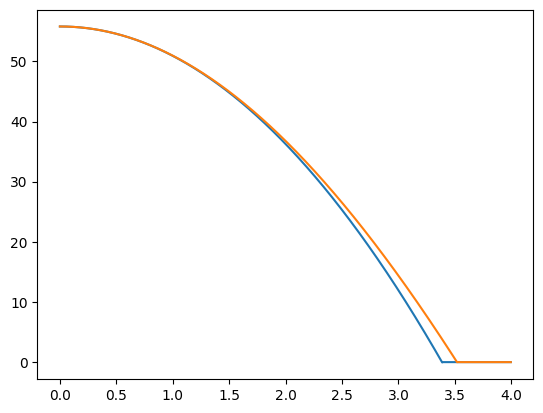

In [353]:
plt.plot(t,y[0])
plt.plot(t,y[2])

Ejercicio 16

In [354]:
y0 = np.array([10, 0])

def boing(t, y):
    return np.array([y[1], -g])

In [355]:
def rebote(a, b, n, y0):
    h = (b-a)/n 
    t = np.arange(a, b, h)
    y = np.zeros((len(y0), n))
    y[:,0] = y0

    for i in range(n-1):
        y[:,i+1] = y[:,i] + h*boing(t[i], y[:,i]) 
        if y[:,i+1][0] < 0:
            y[:,i+1] = [-y[:,i][0], -y[:,i][1]]

    return (t, y)

In [356]:
t, y = rebote(0, 10, 10000, y0)

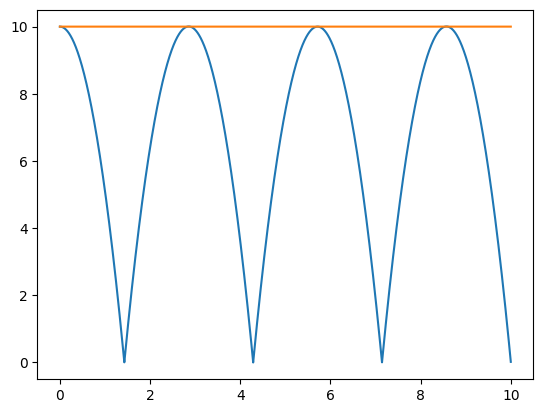

In [357]:
plt.plot(t, y[0])
plt.plot(t, [10 for i in range(len(t))])

In [358]:
def reboteEnergia(a, b, n, y0):
    h = (b-a)/n 
    t = np.arange(a, b, h)
    y = np.zeros((len(y0), n))
    y[:,0] = y0

    for i in range(n-1):
        y[:,i+1] = y[:,i] + h*boing(t[i], y[:,i]) 
        if y[:,i+1][0] < 0:
            y[:,i+1] = [-y[:,i][0], -0.8*y[:,i][1]]

    return (t, y)

In [359]:
t, y = reboteEnergia(0, 10, 10000, y0)

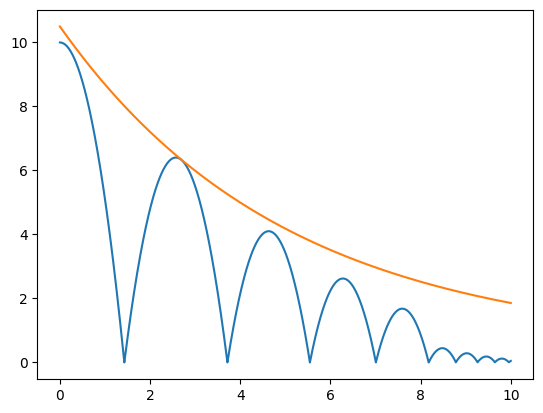

In [360]:
plt.plot(t, y[0])
plt.plot(t, [1/2+10*np.e**(-x/5) for x in t])

Ejercicio 17

In [361]:
g = 9.8
ancho = 10
y0 = np.array([0,4,5,4])

In [362]:
def hab(t, y):
    return np.array([y[1], 0, y[3], -g])

In [363]:
def habitacion(a,b,n,ancho, y0):
    h = (b-a)/n 
    t = np.arange(a,b,h)
    y = np.zeros((len(y0), n))
    y[:,0] = y0

    for i in range(n-1):
        y[:,i+1] = y[:,i] + h*hab(t[i], y[:,i])
        if y[:,i+1][0] > ancho:
            y[:,i+1][0], y[:,i+1][1] = [ancho, -y[:,i+1][1]]
        if y[:,i+1][0] < 0:
            y[:,i+1][0], y[:,i+1][1] = [-y[:,i+1][0], -y[:,i+1][1]]
        if y[:,i+1][2] < 0:
            y[:,i+1][2], y[:,i+1][3] = [-y[:,i+1][2], -y[:,i+1][3]]

    return (t,y)

In [364]:
t, y = habitacion(0, 10, 10000, ancho, y0)

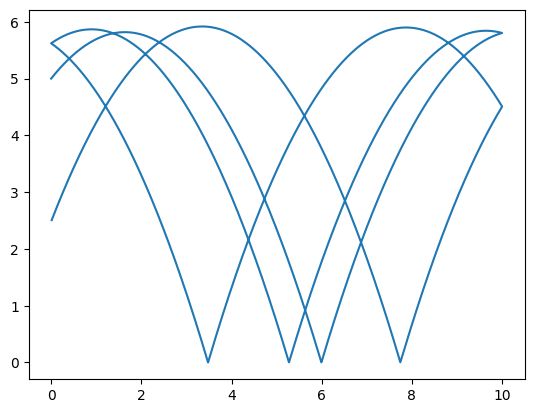

In [365]:
plt.plot(y[0], y[2])

In [366]:
def habitacionPerdida(a,b,n,ancho,y0,A1,A2,alp):
    h = (b-a)/n 
    t = np.arange(a,b,h)
    y = np.zeros((len(y0), n))
    y[:,0] = y0

    for i in range(n-1):
        K1 = hab(t[i], y[:,i])
        K2 = hab(t[i]+alp*h, y[:,i]+alp*h*K1)
        y[:,i+1] = y[:,i] + h*(A1*K1+A2*K2)
        if y[:,i+1][0] > ancho:
            y[:,i+1][0], y[:,i+1][1] = [ancho, -0.8*y[:,i+1][1]]
        if y[:,i+1][0] < 0:
            y[:,i+1][0], y[:,i+1][1] = [-y[:,i+1][0], -0.8*y[:,i+1][1]]
        if y[:,i+1][2] < 0:
            y[:,i+1][2], y[:,i+1][3] = [-y[:,i+1][2], -0.9*y[:,i+1][3]]

    return (t,y)

In [367]:
t, y = habitacionPerdida(0, 10, 500, ancho, y0, 1/2, 1/2, 1)

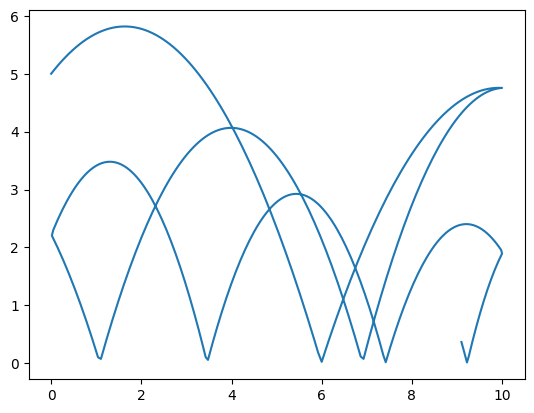

In [368]:
plt.plot(y[0], y[2])

In [369]:
'''
tray_x = y[0]
tray_y = y[2]

tray_x = list(map(float, tray_x))
tray_y = list(map(float, tray_y))

fig, ax = plt.subplots(figsize=(8, 4))
ax.set_xlim(0, ancho)
ax.set_ylim(0, 10)
pelota, = ax.plot([], [], 'ro', markersize=10)
trayectoria, = ax.plot([], [], 'b-', lw=1)

def init():
    pelota.set_data([], [])
    trayectoria.set_data([], [])
    return pelota, trayectoria

def update(frame):
    x_val = tray_x[frame]
    y_val = tray_y[frame]
    pelota.set_data([x_val], [y_val]) 
    trayectoria.set_data(tray_x[:frame+1], tray_y[:frame+1])
    return pelota, trayectoria

ani = animation.FuncAnimation(fig, update, frames=len(tray_x),init_func=init, blit=True, interval=10)


ani.save("pelota.gif", writer=animation.PillowWriter(fps=20))
display(Image(filename="pelota.gif"))
'''

'\ntray_x = y[0]\ntray_y = y[2]\n\ntray_x = list(map(float, tray_x))\ntray_y = list(map(float, tray_y))\n\nfig, ax = plt.subplots(figsize=(8, 4))\nax.set_xlim(0, ancho)\nax.set_ylim(0, 10)\npelota, = ax.plot([], [], \'ro\', markersize=10)\ntrayectoria, = ax.plot([], [], \'b-\', lw=1)\n\ndef init():\n    pelota.set_data([], [])\n    trayectoria.set_data([], [])\n    return pelota, trayectoria\n\ndef update(frame):\n    x_val = tray_x[frame]\n    y_val = tray_y[frame]\n    pelota.set_data([x_val], [y_val]) \n    trayectoria.set_data(tray_x[:frame+1], tray_y[:frame+1])\n    return pelota, trayectoria\n\nani = animation.FuncAnimation(fig, update, frames=len(tray_x),init_func=init, blit=True, interval=10)\n\n\nani.save("pelota.gif", writer=animation.PillowWriter(fps=20))\ndisplay(Image(filename="pelota.gif"))\n'

Ejercicio 18

In [370]:
q = (-1.6)*(10**(-19))
m = 9.1*(10**(-31))
Bx = 0
By = 0
Bz = 0.11
v = 270000
y0 = np.array([0,0,0,v,0,0])

In [371]:
def Lorentz(t, y, p):
    return np.array([y[3], y[4], y[5], (p[0]/p[1])*(p[4]*y[4]-p[3]*y[5]), (p[0]/p[1])*(p[2]*y[5]-p[4]*y[3]), (p[0]/p[1])*(p[3]*y[3]-p[2]*y[4])])

In [372]:
t, y = Euler(0, 1e-8, 1000, Lorentz, y0, [q,m,Bx,By,Bz])

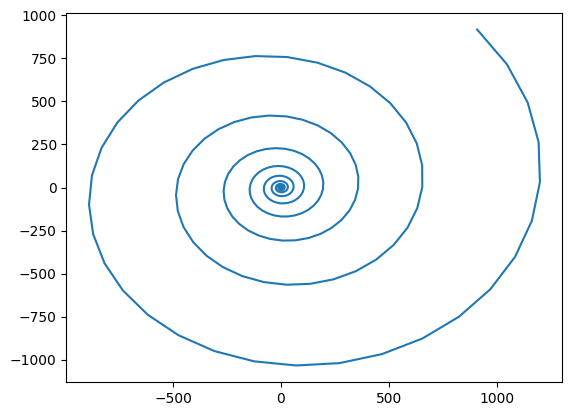

In [373]:
plt.plot(y[0],y[1])

Text(0.5, 0.92, 'Lorenz attractor phase diagram')

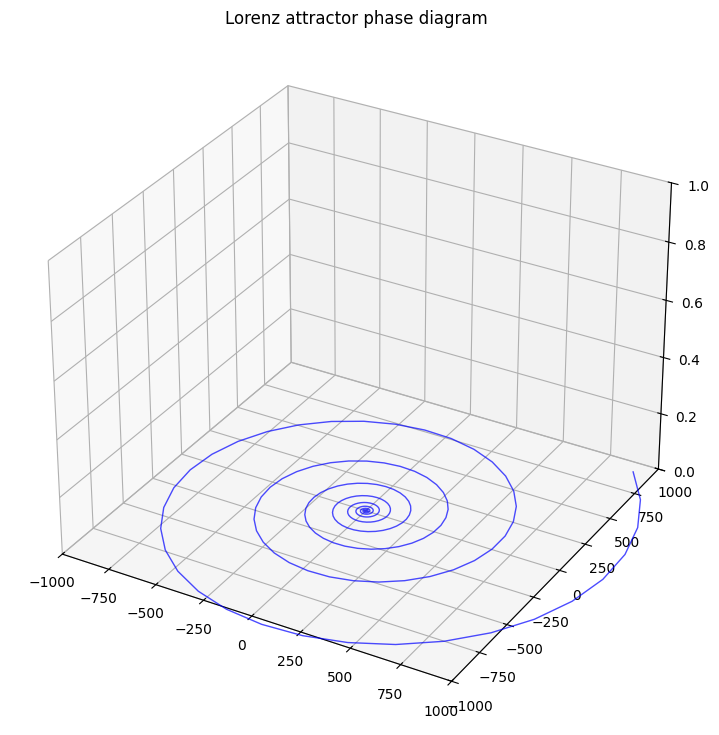

In [374]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((-1000, 1000))
ax.set_ylim((-1000, 1000))
ax.set_zlim((0, 1))
ax.plot(y[0], y[1], y[2], color='blue', alpha=0.7, linewidth=1)
ax.set_title('Lorenz attractor phase diagram')

In [375]:
for i in range(len(t)):
    if y[0,i] > 0 and y[1,i] < 0 and y[1,i+1] >= 0:
        print(t[i])
        break

3.8000000000000003e-10


In [376]:
(2*np.pi*m)/(-q*Bz)

3.2486924031439906e-10

Ejercicio 19

In [377]:
m = 2
b = 2
k = 1
y0 = np.array([1, 0])

In [378]:
def amortiguado(t, y, f, m, b, k):
    return np.array([y[1], (-b*y[1]-k*y[0]+f(t,y[0]))/m])

In [379]:
def oscilador(a,b,n,f,y0,m,b1,k):
    h = (b-a)/n 
    t = np.arange(a,b,h)
    y = np.zeros((len(y0), n))
    y[:,0] = y0

    for i in range(n-1):
        y[:,i+1] = y[:,i] + h*amortiguado(t[i], y[:,i], f, m, b1, k)

    return (t, y)

In [380]:
def f(t, x):
    return 0

t, y = oscilador(0, 20, 1000, f, y0, m, b, k)

In [381]:
def g(t,x):
    return np.sin(t)

t1, y1 = oscilador(0, 20, 1000, g, y0, m, b, k)

In [382]:
lamb = np.sqrt(4*m*k-b**2)/(2*m)

def h(t, x):
    return np.cos(lamb*t)

t2, y2 = oscilador(0, 20, 1000, h, y0, m, b, k)

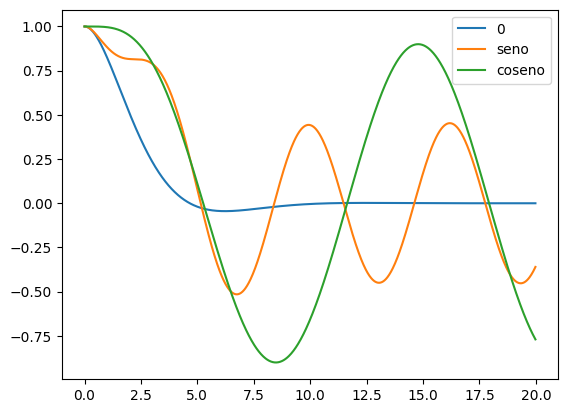

In [383]:
plt.plot(t, y[0], label = "0")
plt.plot(t1, y1[0], label = "seno")
plt.plot(t2, y2[0], label = "coseno")
plt.legend()
plt.show()

Diagramas de fases con distintos casos de discriminante (f = 0)

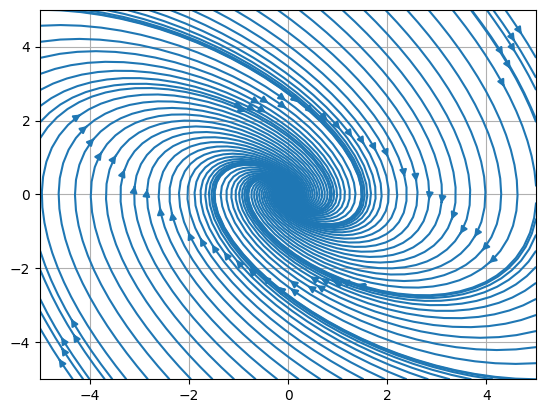

In [384]:
#Caso complejo, parte real negativa, estable
m = b = k = 1
Y, X = np.mgrid[-5:5:10j, -5:5:10j]
U, V = amortiguado(0, [X, Y], f, m, b, k)

plt.streamplot(X, Y, U, V, density=0.8, broken_streamlines=False)
plt.grid()
plt.show()

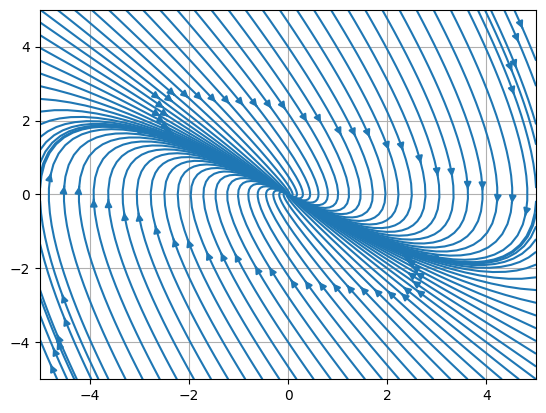

In [385]:
#Caso unico real, es negativo, estable
m = k = 1
b = 2
Y, X = np.mgrid[-5:5:10j, -5:5:10j]
U, V = amortiguado(0, [X, Y], f, m, b, k)

plt.streamplot(X, Y, U, V, density=1, broken_streamlines=False)
plt.grid()
plt.show()

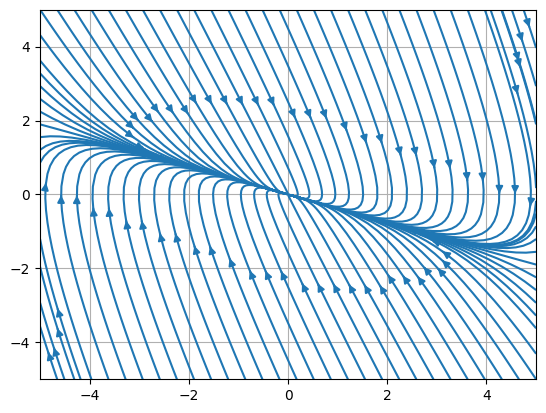

In [386]:
#Caso real, son dos negativos, es estable
m = k = 1
b = 3
Y, X = np.mgrid[-5:5:10j, -5:5:10j]
U, V = amortiguado(0, [X, Y], f, m, b, k)

plt.streamplot(X, Y, U, V, density=1, broken_streamlines=False)
plt.grid()
plt.show()

Ejercicio 20

In [387]:
def ec1(mu):

    def dx(t, x):
        return mu-x**2
    
    X, T = np.mgrid[-1:1:5j, -1:1:5j]
    U = dx(T, X)

    plt.streamplot(T, X, T, U, density=0.45, broken_streamlines=False)
    plt.grid()
    plt.show()

wi.interact(ec1, mu = wi.FloatSlider(value = 0, min = -2, max = 2, step = 0.1))

interactive(children=(FloatSlider(value=0.0, description='mu', max=2.0, min=-2.0), Output()), _dom_classes=('w…

<function __main__.ec1(mu)>

In [388]:
def ec2(mu):

    def dx(t, x):
        return mu*x-x**2
    
    X, T = np.mgrid[-1:1:5j, -1:1:5j]
    U = dx(T, X)

    plt.streamplot(T, X, T, U, density=0.45, broken_streamlines=False)
    plt.grid()
    plt.show()

wi.interact(ec2, mu = wi.FloatSlider(value = 0, min = -2, max = 2, step = 0.1))

interactive(children=(FloatSlider(value=0.0, description='mu', max=2.0, min=-2.0), Output()), _dom_classes=('w…

<function __main__.ec2(mu)>

In [389]:
def ec3(mu):

    def dx(t, x):
        return mu*x-x**3
    
    X, T = np.mgrid[-1:1:5j, -1:1:5j]
    U = dx(T, X)

    plt.streamplot(T, X, T, U, density=0.45, broken_streamlines=False)
    plt.grid()
    plt.show()

wi.interact(ec3, mu = wi.FloatSlider(value = 0, min = -2, max = 2, step = 0.1))

interactive(children=(FloatSlider(value=0.0, description='mu', max=2.0, min=-2.0), Output()), _dom_classes=('w…

<function __main__.ec3(mu)>

Ejercicio 21.1

In [390]:
def vanderpol(mu):

    def vander(x):
        return [x[1], (mu*(1-(x[0]**2))*x[1])+x[0]]
    
    Y, X = np.mgrid[-5:5:10j, -5:5:10j]
    U, V = vander([X, Y],)

    plt.streamplot(X, Y, U, V, density=[1,1], broken_streamlines=False)
    plt.grid()
    plt.show()

wi.interact(vanderpol, mu = wi.FloatSlider(value = 1, min = -2, max = 2, step = 0.1))

interactive(children=(FloatSlider(value=1.0, description='mu', max=2.0, min=-2.0), Output()), _dom_classes=('w…

<function __main__.vanderpol(mu)>

Ejercicio 21.2

$$x' = y$$
$$y' = -A.sin(x)-b.y$$
$$x(0) = x_0$$
$$y(0) = y_0$$

In [391]:
def pendulo(A, b):

    def pen(x):
        return [x[1], -A*np.sin(x[0])-b*x[1]]
    
    Y, X = np.mgrid[-3:3:10j, -6:6:10j]
    U, V = pen([X, Y])

    plt.streamplot(X, Y, U, V, density=[1,1], broken_streamlines=False)
    plt.grid()
    plt.show()

wi.interact(pendulo, A = wi.FloatSlider(value = 1, min = -2, max = 2, step = 0.1), 
                     b = wi.FloatSlider(value = 1, min = -2, max = 2, step = 0.1))

interactive(children=(FloatSlider(value=1.0, description='A', max=2.0, min=-2.0), FloatSlider(value=1.0, descr…

<function __main__.pendulo(A, b)>

Ejercicio 22

In [392]:
a = b = 0.2
c = 2.3

y0 = np.array([1,1,1])

def rossler(t, y, p):
    return np.array([-y[1]-y[2], y[0]+p[0]*y[1], p[1]+y[0]*y[2]-p[2]*y[2]])

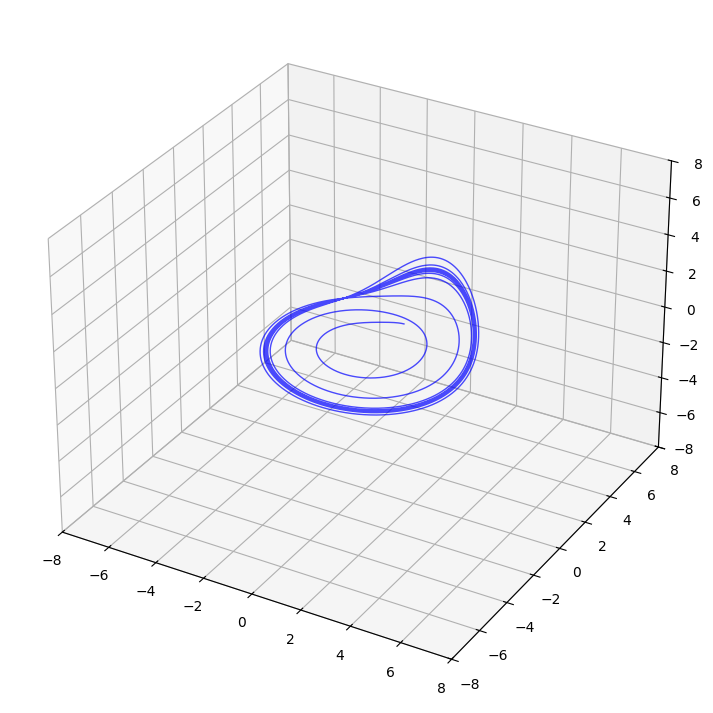

In [393]:
t, y = Euler(0,100,10000,rossler,y0,[a,b,c])

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((-8, 8))
ax.set_ylim((-8, 8))
ax.set_zlim((-8, 8))
ax.plot(y[0], y[1], y[2], color='blue', alpha=0.7, linewidth=1)

El sistema evoluciona, pero parece querer "repetir" una de los recorridos muchas veces, si tomo el ultimo punto como mi nuevo dato inicial entonces puedo volver a calcular la solucion y ver si se establece. 

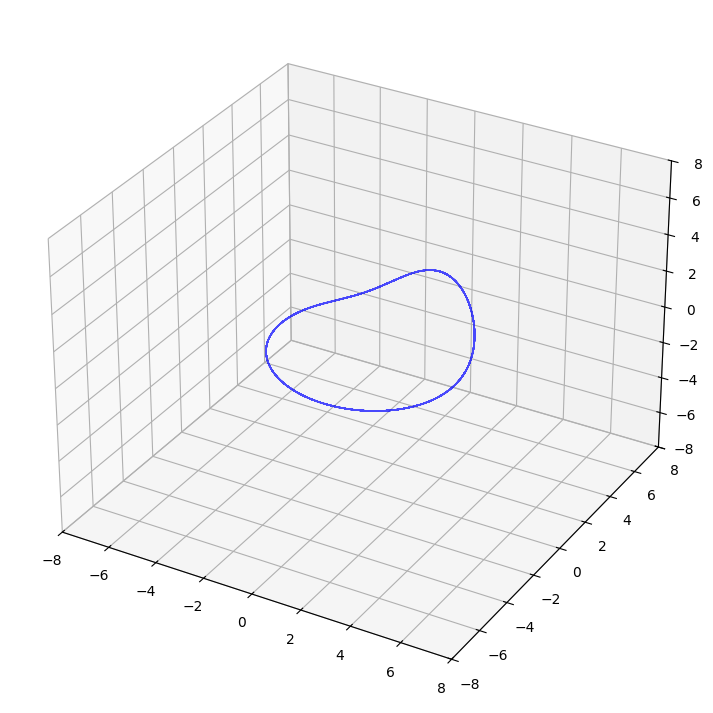

In [394]:
y0 = y[:,len(t)-1]
t, y = Euler(0,100,10000,rossler,y0,[a,b,c])

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((-8, 8))
ax.set_ylim((-8, 8))
ax.set_zlim((-8, 8))
ax.plot(y[0], y[1], y[2], color='blue', alpha=0.7, linewidth=1)

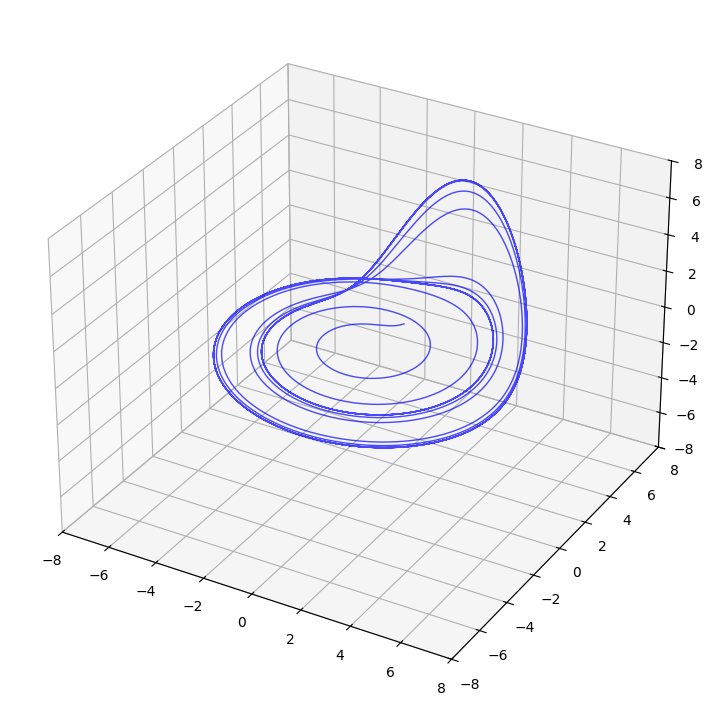

In [395]:
y0 = np.array([1,1,1])
t, y = Euler(0,100,10000,rossler,y0,[a,b,3.3])

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((-8, 8))
ax.set_ylim((-8, 8))
ax.set_zlim((-8, 8))
ax.plot(y[0], y[1], y[2], color='blue', alpha=0.7, linewidth=1)

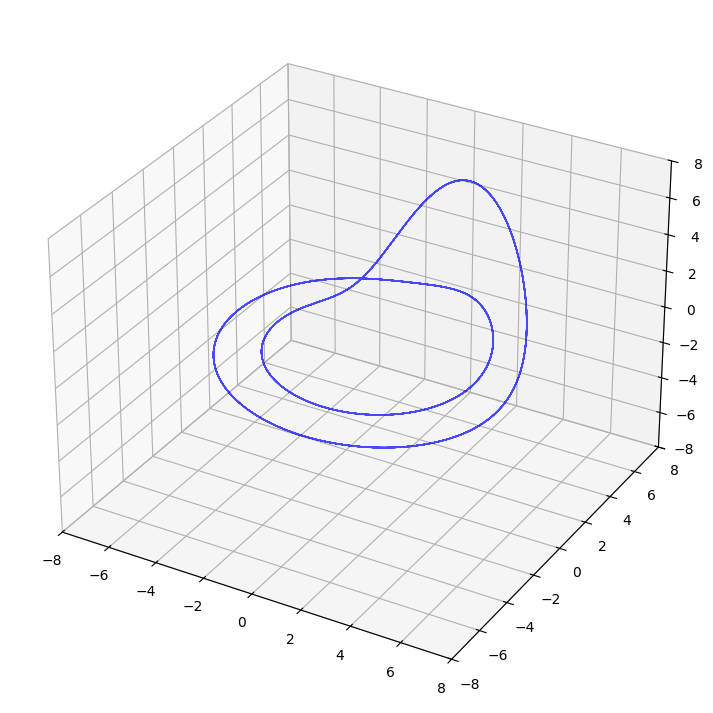

In [396]:
y0 = y[:,len(t)-1]
t, y = Euler(0,100,10000,rossler,y0,[a,b,3.3])

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((-8, 8))
ax.set_ylim((-8, 8))
ax.set_zlim((-8, 8))
ax.plot(y[0], y[1], y[2], color='blue', alpha=0.7, linewidth=1)

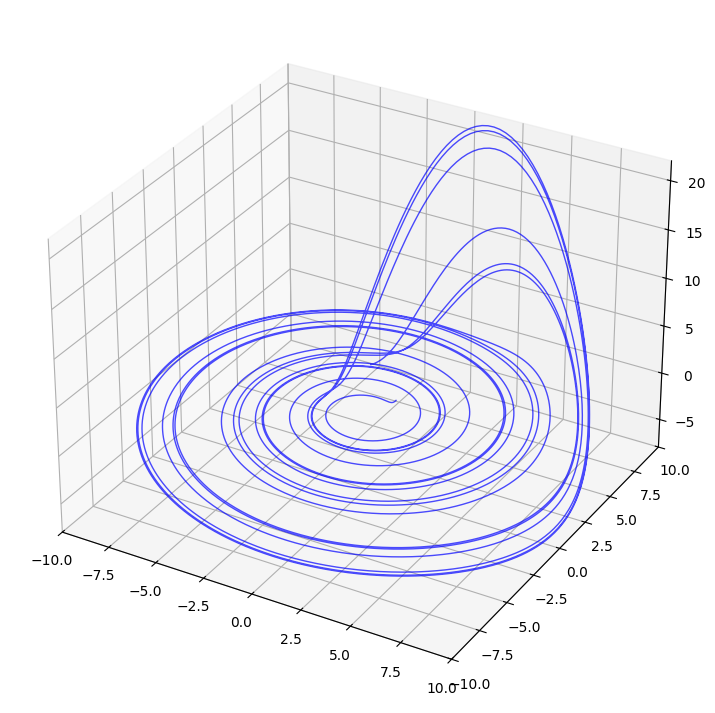

In [397]:
y0 = np.array([1,1,1])
t, y = Euler(0,100,10000,rossler,y0,[a,b,6.3])

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((-10, 10))
ax.set_ylim((-10, 10))
ax.set_zlim((-8, 22))
ax.plot(y[0], y[1], y[2], color='blue', alpha=0.7, linewidth=1)

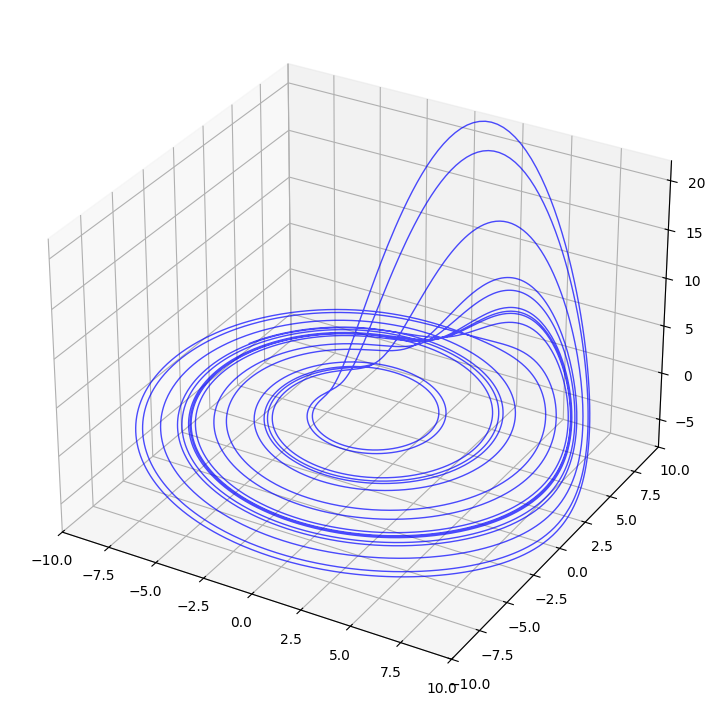

In [398]:
y0 = y[:,len(t)-1]
t, y = Euler(0,100,10000,rossler,y0,[a,b,6.3])

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((-10, 10))
ax.set_ylim((-10, 10))
ax.set_zlim((-8, 22))
ax.plot(y[0], y[1], y[2], color='blue', alpha=0.7, linewidth=1)

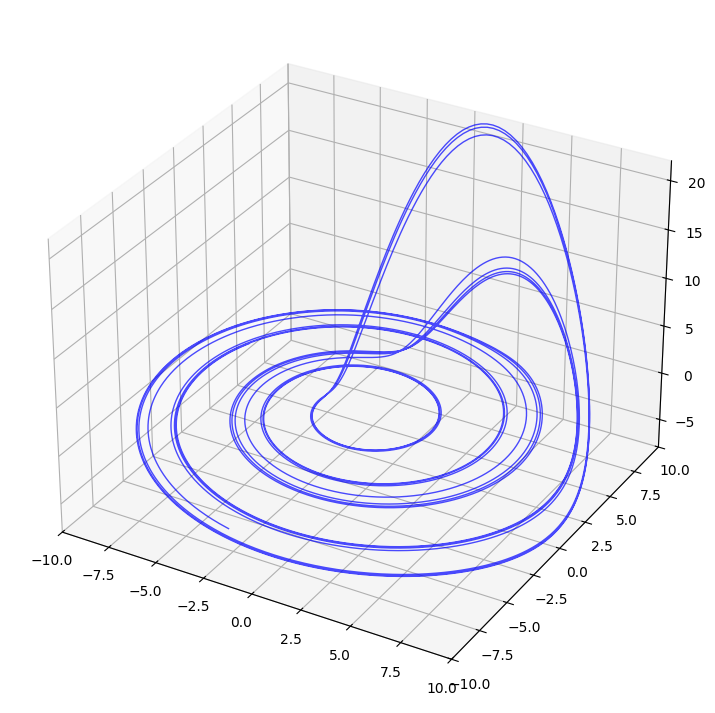

In [399]:
y0 = y[:,len(t)-1]
t, y = Euler(0,100,10000,rossler,y0,[a,b,6.3])

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((-10, 10))
ax.set_ylim((-10, 10))
ax.set_zlim((-8, 22))
ax.plot(y[0], y[1], y[2], color='blue', alpha=0.7, linewidth=1)

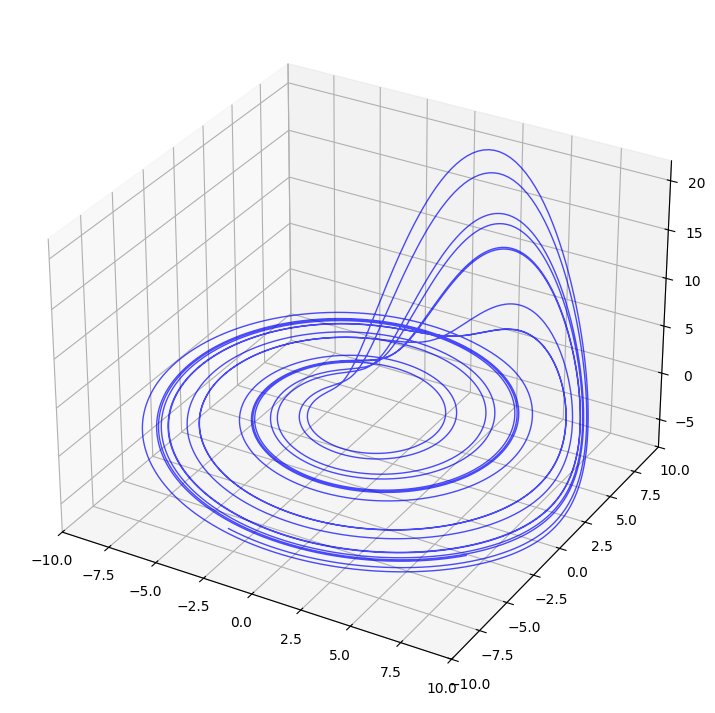

In [400]:
y0 = y[:,len(t)-1]
t, y = Euler(0,100,10000,rossler,y0,[a,b,6.3])

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((-10, 10))
ax.set_ylim((-10, 10))
ax.set_zlim((-8, 22))
ax.plot(y[0], y[1], y[2], color='blue', alpha=0.7, linewidth=1)

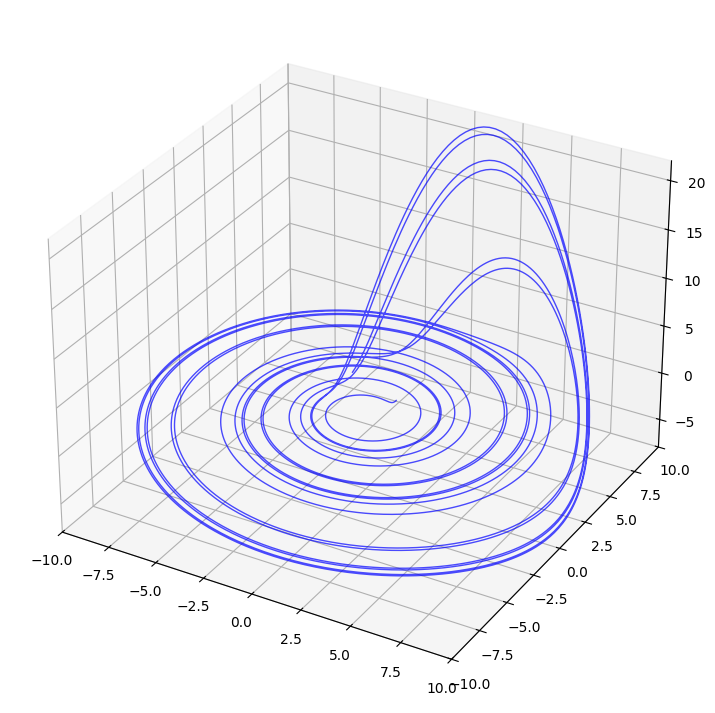

In [401]:
y0 = np.array([1.01,1,1])
t, y = Euler(0,100,10000,rossler,y0,[a,b,6.3])

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((-10, 10))
ax.set_ylim((-10, 10))
ax.set_zlim((-8, 22))
ax.plot(y[0], y[1], y[2], color='blue', alpha=0.7, linewidth=1)

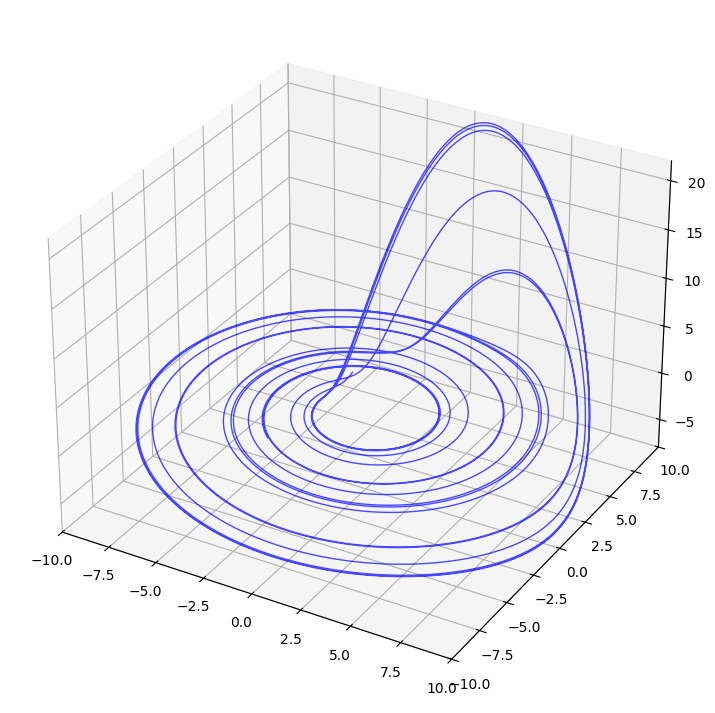

In [402]:
y0 = y[:, len(t)-1]
t, y = Euler(0,100,10000,rossler,y0,[a,b,6.3])

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((-10, 10))
ax.set_ylim((-10, 10))
ax.set_zlim((-8, 22))
ax.plot(y[0], y[1], y[2], color='blue', alpha=0.7, linewidth=1)

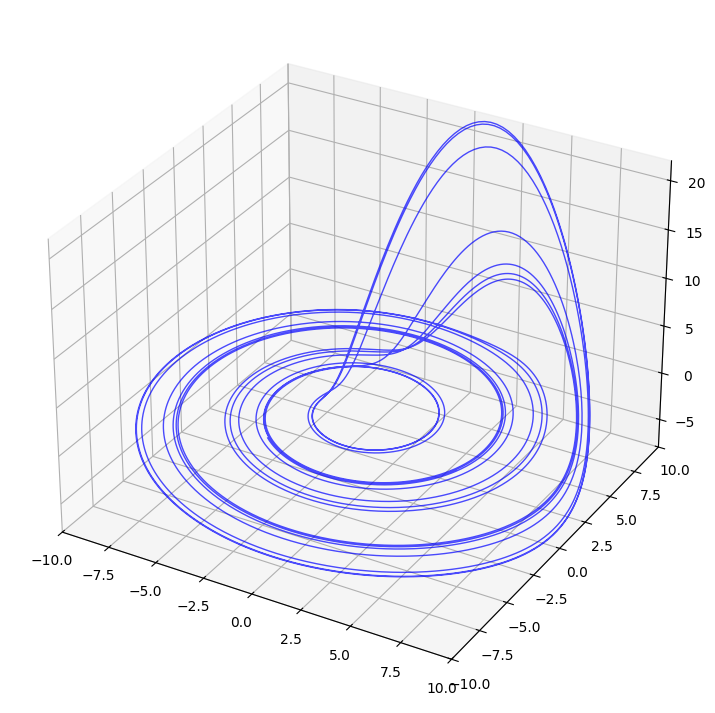

In [403]:
y0 = y[:, len(t)-1]
t, y = Euler(0,100,10000,rossler,y0,[a,b,6.3])

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((-10, 10))
ax.set_ylim((-10, 10))
ax.set_zlim((-8, 22))
ax.plot(y[0], y[1], y[2], color='blue', alpha=0.7, linewidth=1)

Ejercicio 23

In [404]:
o = 10
b = 8/3
r = 1/2
y0 = np.array([1,1,1])

In [405]:
def Lorentz2(t,y,p):
    return np.array([p[0]*(y[1]-y[0]), p[1]*y[0]-y[1]-y[0]*y[2], y[0]*y[1]-p[2]*y[2]])

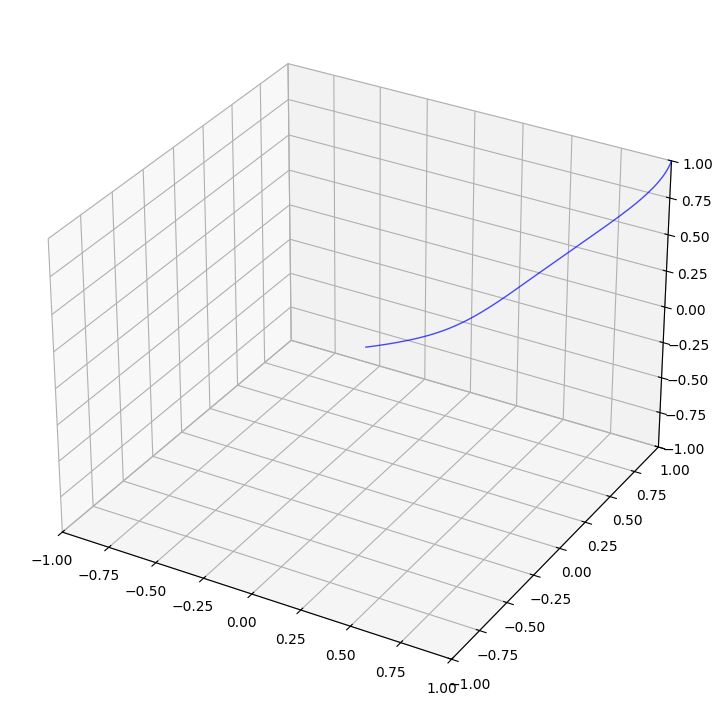

In [406]:
t, y = Euler(0, 100, 10000, Lorentz2, y0, [o, 1/2, b])

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((-1, 1))
ax.set_ylim((-1, 1))
ax.set_zlim((-1, 1))

ax.plot(y[0], y[1], y[2], color='blue', alpha=0.7, linewidth=1)

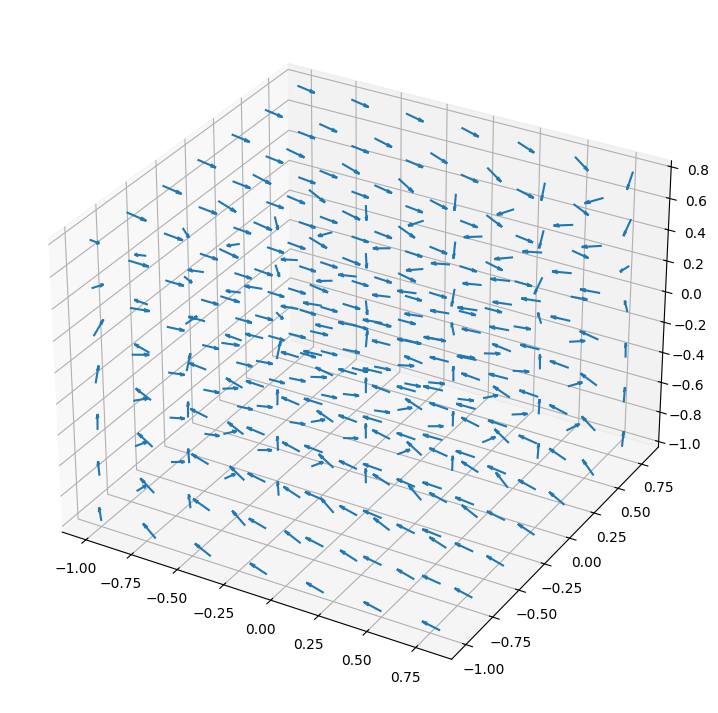

In [407]:
def Lorentz(t,y,p):
    return np.array([p[0]*(y[1]-y[0]), p[1]*y[0]-y[1]-y[0]*y[2], y[0]*y[1]-p[2]*y[2]])

o = 10
b = 8/3
r = 1/2
y0 = np.array([1,1,1])

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

Z, Y, X = np.meshgrid(np.arange(-1, 1, 0.3),
                      np.arange(-1, 1, 0.3),
                      np.arange(-1, 1, 0.3))
U , V, W = Lorentz(0, [X, Y, Z], [o, r, b])

ax.quiver(X, Y, Z, U, V, W, length=0.1, normalize=True)

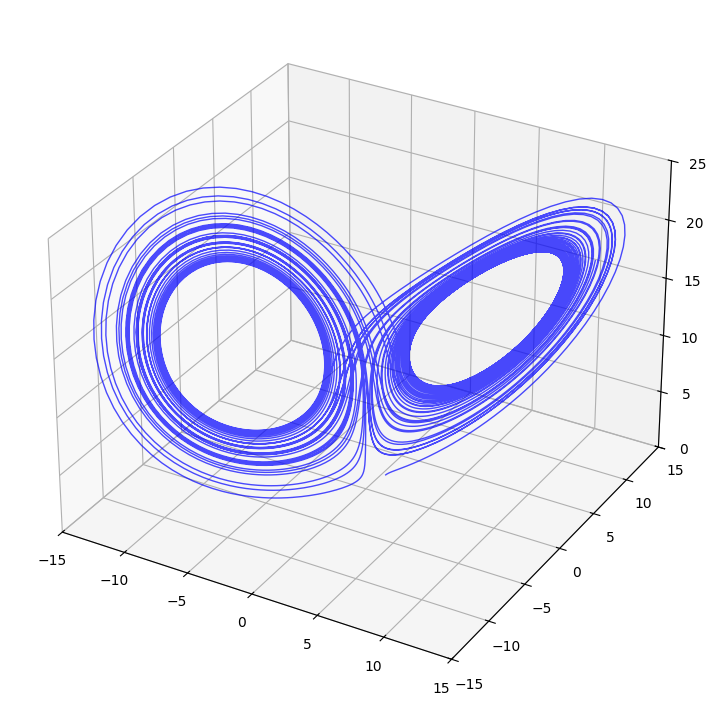

In [408]:
y0 = np.array([1,1,1])
t, y = Euler(0, 100, 10000, Lorentz2, y0, [o, 15, b])

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((-15, 15))
ax.set_ylim((-15, 15))
ax.set_zlim((0, 25))
ax.plot(y[0], y[1], y[2], color='blue', alpha=0.7, linewidth=1)

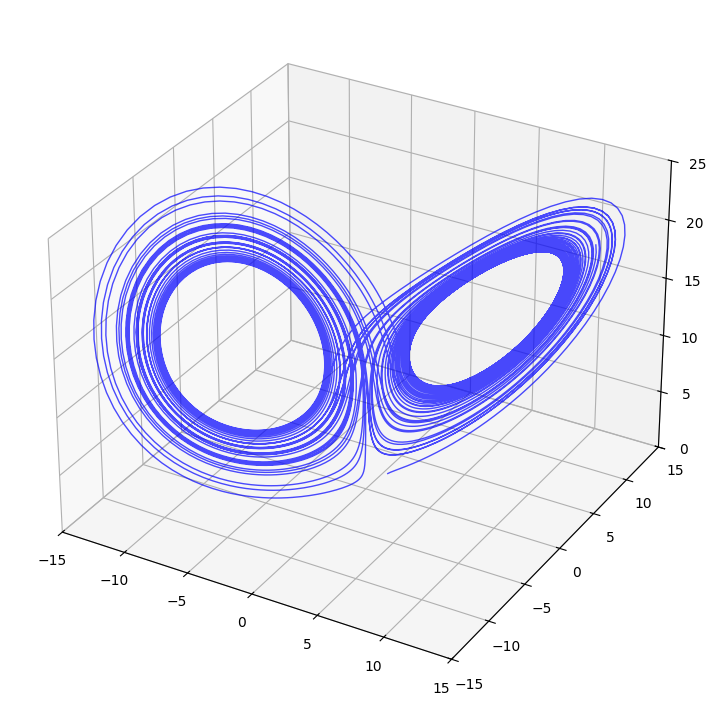

In [409]:
y0 = y[:,len(y)-1]
t, y = Euler(0, 100, 10000, Lorentz2, y0, [o, 15, b])

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((-15, 15))
ax.set_ylim((-15, 15))
ax.set_zlim((0, 25))
ax.plot(y[0], y[1], y[2], color='blue', alpha=0.7, linewidth=1)

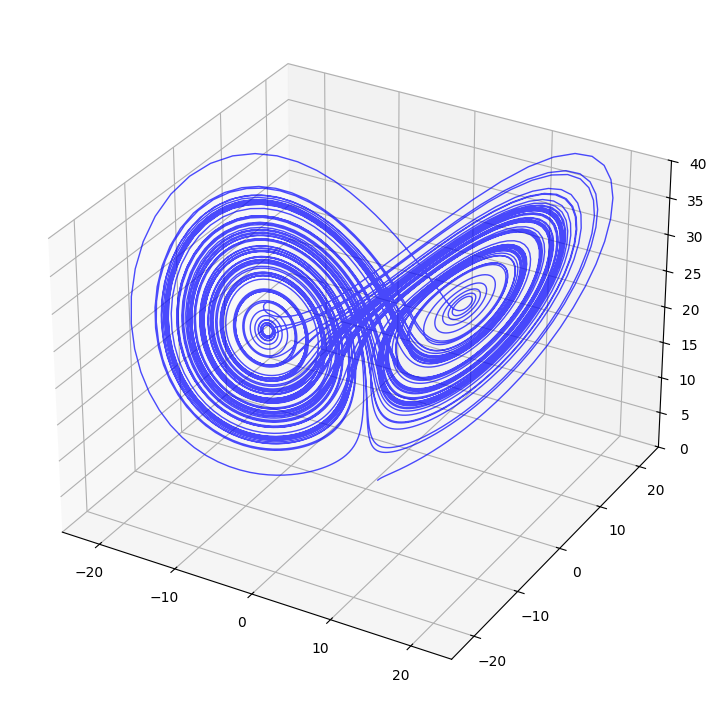

In [410]:
y0 = np.array([1,1,1])
t, y = Euler(0, 100, 10000, Lorentz2, y0, [o, 25, b])

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((-25, 25))
ax.set_ylim((-25, 25))
ax.set_zlim((0, 40))
ax.plot(y[0], y[1], y[2], color='blue', alpha=0.7, linewidth=1)

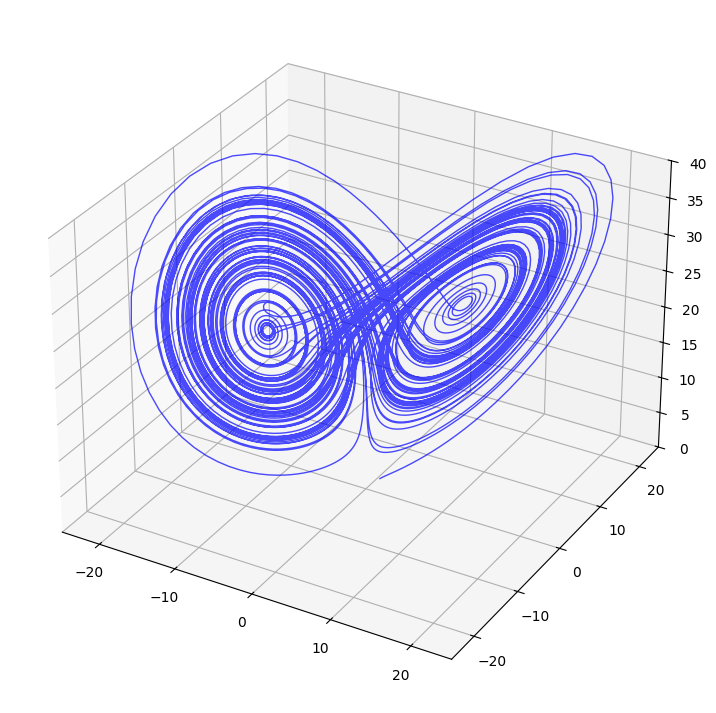

In [411]:
y0 = y[:,len(y)-1]
t, y = Euler(0, 100, 10000, Lorentz2, y0, [o, 25, b])

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((-25, 25))
ax.set_ylim((-25, 25))
ax.set_zlim((0, 40))
ax.plot(y[0], y[1], y[2], color='blue', alpha=0.7, linewidth=1)